# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**DATOS NECESARIOS**

Para iniciar la tarea de valuar necesitamos tener un conjunto de datos apropiado, que pueda describir las características más resaltantes de
las propiedades a estudiar. A continuación se mencionan las características principales que se muestran en los portales inmobiliarios, por lo que se pueden considerar de gran ayuda al momento de iniciar la resolución del problema:

1. País
1. Ciudad
1. Barrio
1. Cantidad de ambientes
1. Cantidad de dormitorios
1. Cantidad de baños
1. Superficie total
1. Superficie cubierta
1. Antigüedad
1. Expensas
1. Facilidad de acceso a través de transporte público
1. Comodidades adicionales: Balcón, salón de usos múltiples, baulera, entre otros
1. Cercanía a sitios de interés: Escuelas, supermercados, hospitales, atracciones turísticas
1. Modalidad de pago (de contado o a crédito)





### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

 A continuación importamos las librerias de numpy, pandas, seaborn y matplotlib para iniciar el análisis exploratorio de datos:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

   A continuación procedemos a abrir el dataset de Properati, y usar la función .shape para saber las filas y columnas y .head para ver las  instancias. Se observa que hay 146660 filas y 19 columnas


In [2]:
data_properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data_properati.shape)
data_properati.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
print(data_properati.columns) #Con la función .columns se imprimen los nombres de las columnas
print()
data_properati.isna().sum()   #Con las funciones .isna y sum podemos obtener la cantidad de valores faltantes por columna

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')



start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

  Se observa que de las 19 columnas solamente tienen valores nulos las siguientes cinco: lat, lon, bathrooms, surface_total y surface_covered 

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

   A continuación presentamos los tipos de propiedades presentes con su cantidad de instancias:

In [4]:
data_properati.property_type.value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


Se procede a hacer el gráfico de barras de cantidad de instancias por cada tipo de propiedad:

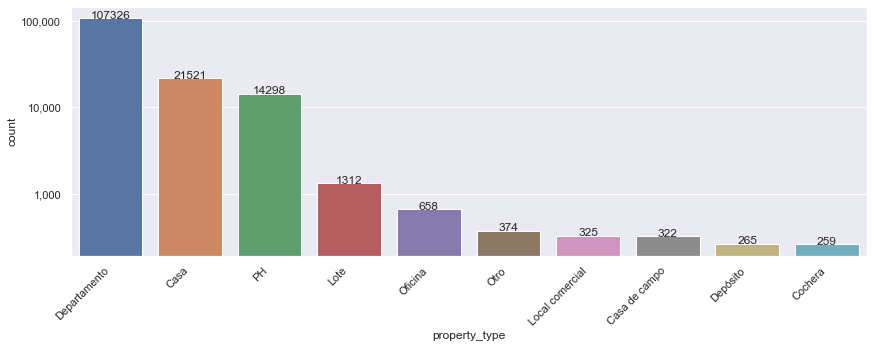

In [5]:
# Se hace el gráfico usando las funcionalidades de Seaborn

plt.figure(figsize=(12,5))
tipo_propiedades = sns.countplot(data = data_properati, x = "property_type", log = True,order = data_properati["property_type"].value_counts().index)
tipo_propiedades.set_xticklabels(tipo_propiedades.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

# Se define una función para mostrar los valores correspondientes a la cantidad de instancias encima de cada barra

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Se llama la función definida previamente

show_values_on_bars(tipo_propiedades, "v")      
        
# Se define la función lambda para poner valores del eje y en numeros enteros en lugar de notación científica
        
f = lambda y, pos: f'{y/10**0:,.0f}'
tipo_propiedades.yaxis.set_major_formatter(FuncFormatter(f))


Se observa que tenemos 10 tipos distintos de propiedades. Los tipos que tienen más instancias son departamento, casa y PH, mientras que los que tienen menos instancias son casa de campo, depósito y cochera

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

En primer lugar se realiza el gráfico de barras para ver la cantidad de instancias de la variable l2, observándose las regiones: Capital Federal, Bs.As. G.B.A. Zona Norte, Bs.As. G.B.A. Zona Sur y Bs.As. G.B.A. Zona Oeste:

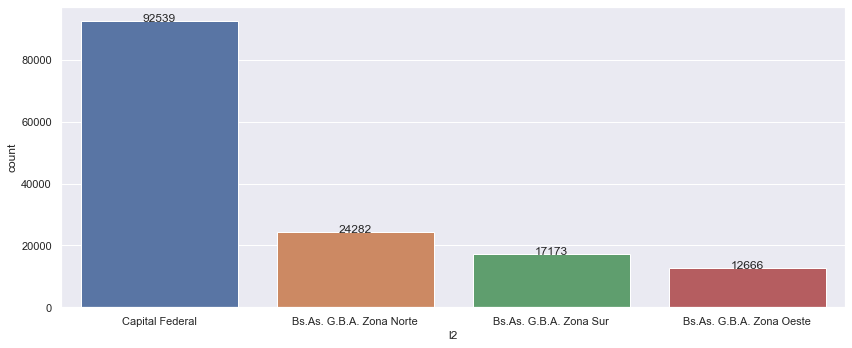

In [6]:
# Grafico de barras para la variable l2

plt.figure(figsize=(12,5))
grafico_l2 = sns.countplot(data = data_properati, x = "l2", log = False, order = data_properati["l2"].value_counts().index)
plt.tight_layout()
    
show_values_on_bars(grafico_l2, "v")


Al momento de hacer el gráfico de barras para l3 se observa que para obtener una mejor visualización de los valores para cada barrio hay que dividir la data según la región

In [7]:
# Creando máscaras para luego realizar gráficas de barras para l3 
# Al graficar data_capital_1 la visualizacion no es adecuada, ya que hay una gran cantidad de barrios
# Se divide la data_capital_1 en dos partes: barrios con mas y con menos de 1000 propiedades

mascara_1 = (data_properati.l2 == "Capital Federal")
data_capital_1 = data_properati[mascara_1]

mascara_2 = (data_properati.l2 == 'Bs.As. G.B.A. Zona Norte')
data_norte = data_properati[mascara_2]

mascara_3 = (data_properati.l2 == 'Bs.As. G.B.A. Zona Sur')
data_sur = data_properati[mascara_3]

mascara_4 = (data_properati.l2 == 'Bs.As. G.B.A. Zona Oeste')
data_oeste = data_properati[mascara_4]


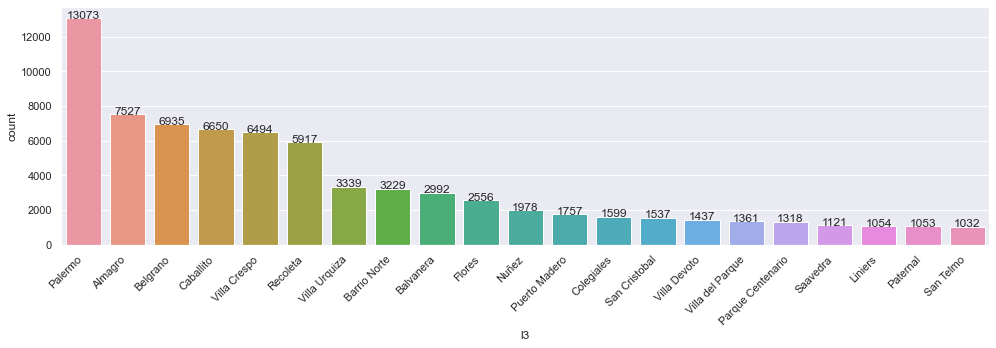

In [8]:
# Data capital con barrios que tengan 1000 o más propiedades

plt.figure(figsize=(14,5))

data_capital_1_a = data_capital_1.groupby("l3").filter(lambda x: len(x) >= 1000)

grafico_capital_1_a = sns.countplot(data = data_capital_1_a, x = "l3", log = False, order = data_capital_1_a["l3"].value_counts().index)
grafico_capital_1_a.set_xticklabels(grafico_capital_1_a.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

show_values_on_bars(grafico_capital_1_a, "v")


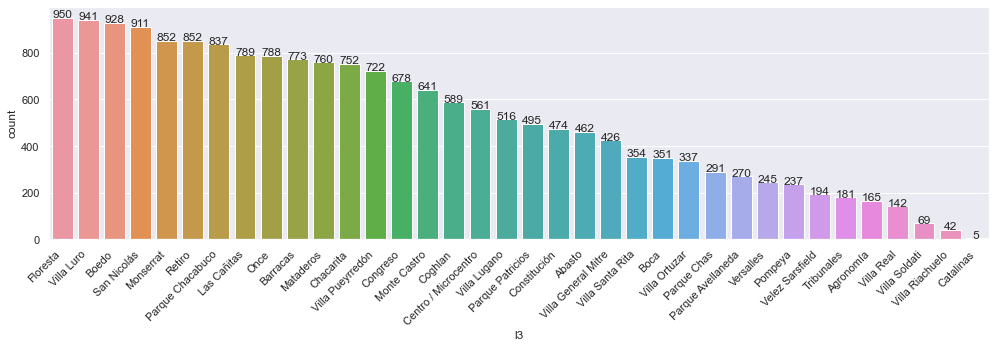

In [9]:
# Data capital con menos de 1000 propiedades

plt.figure(figsize=(14,5))
data_capital_1_b = data_capital_1.groupby("l3").filter(lambda x: len(x) < 1000)

grafico_capital_1_b = sns.countplot(data = data_capital_1_b, x = "l3", log = False, order = data_capital_1_b["l3"].value_counts().index)
grafico_capital_1_b.set_xticklabels(grafico_capital_1_b.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

show_values_on_bars(grafico_capital_1_b, "v")

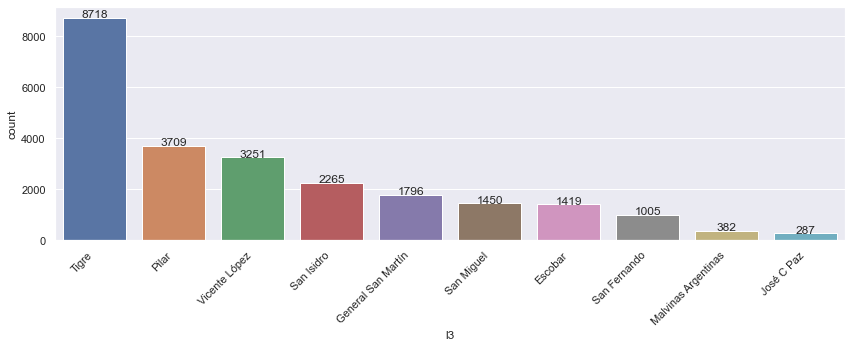

In [10]:
# Hacemos el gráfico de barras por cada barrio de Bs.As. G.B.A. Zona Norte

plt.figure(figsize=(12,5))
grafico_norte = sns.countplot(data = data_norte, x = "l3", log = False, order = data_norte["l3"].value_counts().index)
grafico_norte.set_xticklabels(grafico_norte.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

show_values_on_bars(grafico_norte, "v")

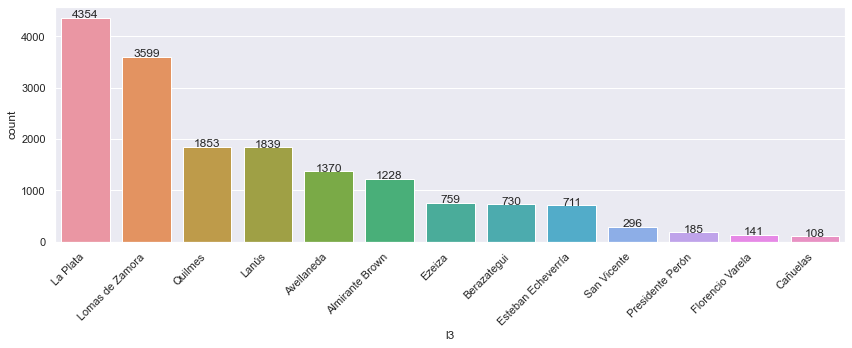

In [11]:
# Hacemos el gráfico de barras por cada barrio de Bs.As. G.B.A. Zona Sur

plt.figure(figsize=(12,5))
grafico_sur = sns.countplot(data = data_sur, x = "l3", log = False, order = data_sur["l3"].value_counts().index)
grafico_sur.set_xticklabels(grafico_sur.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
      
show_values_on_bars(grafico_sur, "v")

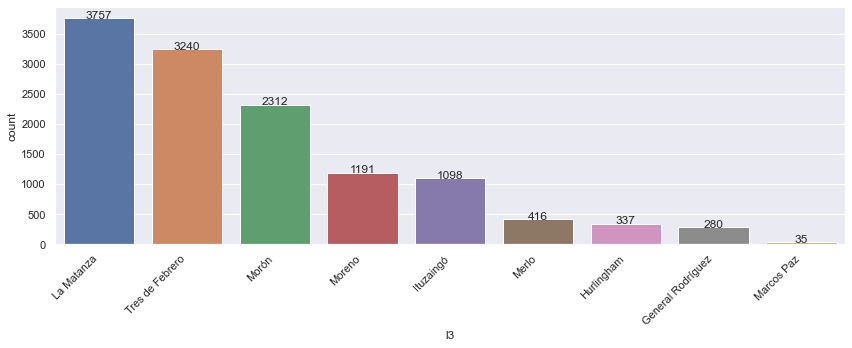

In [12]:
# Hacemos el gráfico de barras por cada barrio de Bs.As. G.B.A. Zona Oeste

plt.figure(figsize=(12,5))
grafico_oeste = sns.countplot(data = data_oeste, x = "l3", log = False, order = data_oeste["l3"].value_counts().index)
grafico_oeste.set_xticklabels(grafico_oeste.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

show_values_on_bars(grafico_oeste, "v")

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Se crea el nuevo data set considerando las tres clases mas abundantes de tipos de propiedad. Se imprime usando .shape y se presentan los valores nulos de cada columna. El dataset presenta 91845 filas y 19 columnas

In [13]:
new_data_properati = data_properati.loc[(data_properati.l2 == 'Capital Federal') & 
                                        ((data_properati.property_type == 'Departamento')  | 
                                         (data_properati.property_type == 'Casa') | (data_properati.property_type == 'PH'))] 
print(new_data_properati.shape)
new_data_properati.isna().sum()

(91485, 19)


start_date            0
end_date              0
created_on            0
lat                4534
lon                4548
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

A continuación se presentan las principales estadísticas para las variables de interés, haciendo uso de la función .describe:

In [14]:
#Estadisticas para cada variable, descartando lat y lon

new_data_properati.drop(columns = ['lat','lon']).describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Hay algunos valores que no tienen mucho sentido como los valores mínimos y máximos de surface_total y surface_covered. Posteriormente se hará un filtrado respecto a algunos de estos valores.

Se presentan los histogramas para la variable surface_total por cada tipo de propiedad, observándose que su distribución tiene asimetría positiva

Text(0, 0.5, 'cantidad PH')

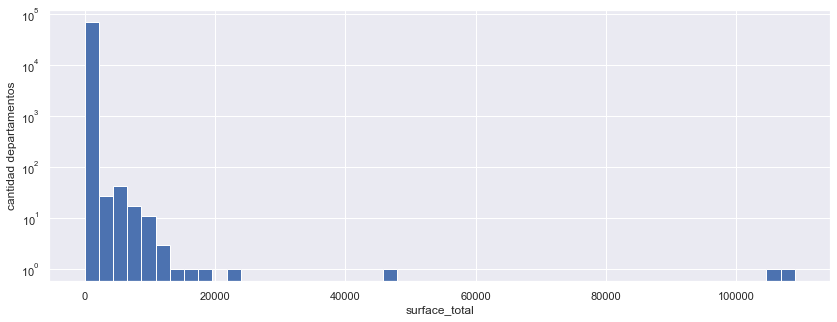

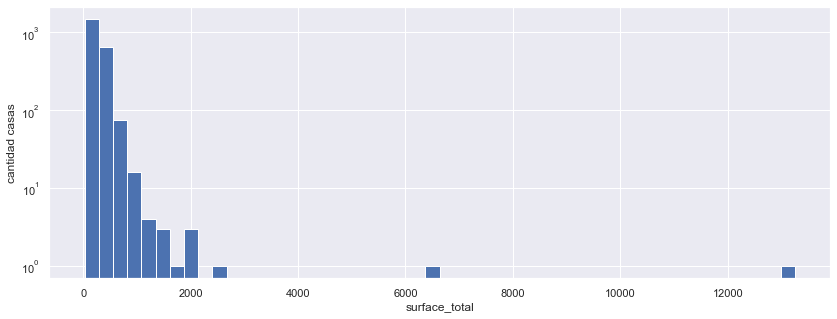

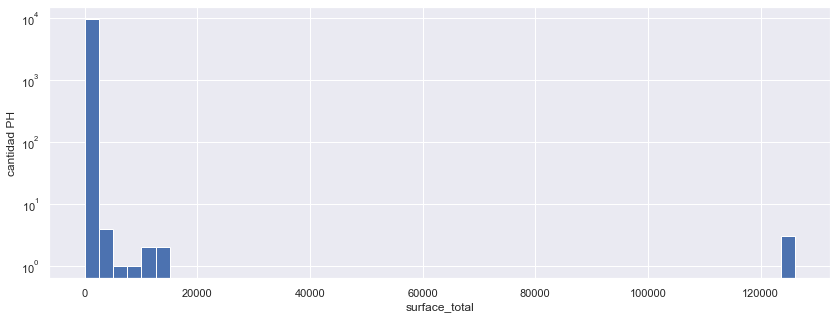

In [15]:
# Histograma para la variable surface_total por tipo de propiedad

tipo_depart = new_data_properati.loc[new_data_properati.property_type == 'Departamento']
tipo_casa = new_data_properati.loc[new_data_properati.property_type == 'Casa']
tipo_ph = new_data_properati.loc[new_data_properati.property_type == 'PH']

plt.figure(figsize=(14,5))
hist_depart= plt.hist(tipo_depart['surface_total'], bins = 50, log = True)
plt.xlabel('surface_total')
plt.ylabel('cantidad departamentos')

plt.figure(figsize=(14,5))
n, bins, _ = plt.hist(tipo_casa['surface_total'], bins = 50, log = True)
plt.xlabel('surface_total')
plt.ylabel('cantidad casas')

plt.figure(figsize=(14,5))
n, bins, _ = plt.hist(tipo_ph['surface_total'], bins = 50, log = True)
plt.xlabel('surface_total')
plt.ylabel('cantidad PH')


Se realiza un diagrama de caja para la variable surface_total por cada tipo de propiedad en Capital Federal:

(0.0, 700.0)

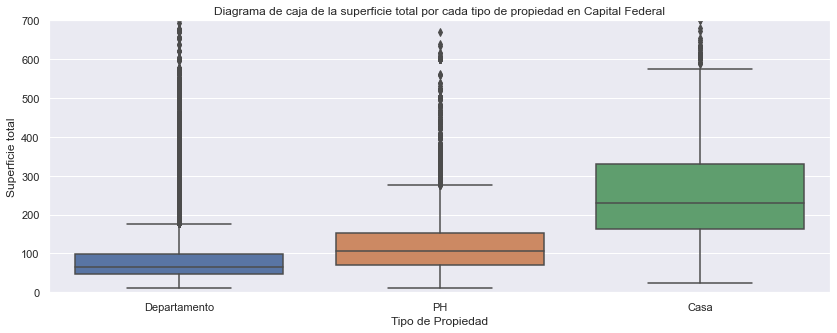

In [16]:
# Diagrama de caja usando Seaborn

plt.figure(figsize=(14,5))
sns.boxplot(data = new_data_properati, x = 'property_type', y = "surface_total")

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn

plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Diagrama de caja de la superficie total por cada tipo de propiedad en Capital Federal')
plt.ylim(0, 700)

Ahora realizamos el filtrado del dataset, seleccionando solamente aquellas propiedades con surface_covered menor o igual a surface_total

In [17]:
# Filtrando propiedades: surface_covered debe ser menor o igual surface_total

filter_surface_1 = new_data_properati.loc[new_data_properati.surface_covered <= new_data_properati.surface_total]
filter_surface_1


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


Con este dataset filtrado realizamos el diagrama de caja para la variable surface_total

(0.0, 700.0)

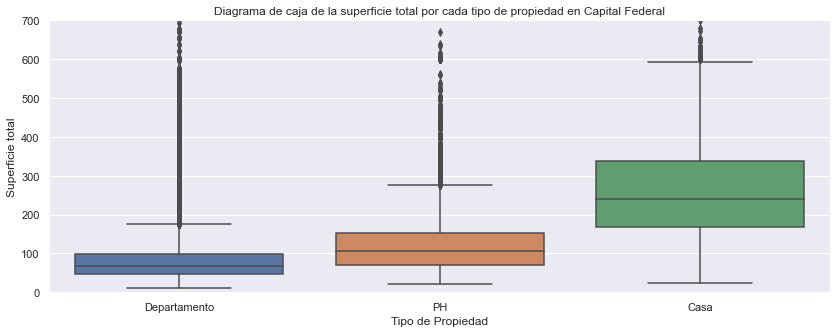

In [18]:
# Diagrama de caja de la superficie total por cada tipo de propiedad en Capital Federal (filtrado por surface_covered <= surface_total)

plt.figure(figsize=(14,5))

sns.boxplot(data = filter_surface_1, x = 'property_type', y = "surface_total")

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Diagrama de caja de la superficie total por cada tipo de propiedad en Capital Federal')
plt.ylim(0, 700)

Se filtra el dataset utilizando el criterio del rango intercuartílico (q75+1,5*IQR) para la variable surface_total:

In [19]:
# Definimos los percentiles y el IQR de la superficie total para cada tipo de propiedad en Capital Federal

#Percentiles para los departamentos
q75, q25 = np.percentile((filter_surface_1.surface_total.loc[filter_surface_1.property_type == 'Departamento']), [75 ,25])
iqr = q75 - q25
lim_surf_dep = q75+1.5*iqr
print('Para departamentos:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_surf_dep)
print()

#Percentiles para los PH
q75, q25 = np.percentile((filter_surface_1.surface_total.loc[filter_surface_1.property_type == 'PH']), [75 ,25])
iqr = q75 - q25
lim_surf_ph = q75+1.5*iqr
print('Para PH:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_surf_ph)
print()

#Percentiles para las casas
q75, q25 = np.percentile((filter_surface_1.surface_total.loc[filter_surface_1.property_type == 'Casa']), [75 ,25])
iqr = q75 - q25
lim_surf_casa = q75+1.5*iqr
print('Para casas: ')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_surf_casa)
print()

Para departamentos:
iqr = 51.0 q75 = 99.0 q25 = 48.0
Limite superior: 175.5

Para PH:
iqr = 82.0 q75 = 152.0 q25 = 70.0
Limite superior: 275.0

Para casas: 
iqr = 170.5 q75 = 338.5 q25 = 168.0
Limite superior: 594.25



Descartando las instancias cuyos valores de surface_total son mayores a los respectivos límites superiores calculados, se obtiene el dataset "filter_surface_all" que consta de 75194 filas y 19 columnas

In [20]:
# Filtrado de surface_total utilizando q75+1,5*IQR

filter_surface_all = (filter_surface_1.loc[((filter_surface_1.property_type == 'Departamento') & 
                 (filter_surface_1.surface_total < lim_surf_dep)) | ((filter_surface_1.property_type == 'PH') & 
                 (filter_surface_1.surface_total < lim_surf_ph)) | ((filter_surface_1.property_type == 'Casa') & 
                 (filter_surface_1.surface_total < lim_surf_casa))])

print(filter_surface_all.shape)

(75194, 19)


Ahora para el dataset "filter_surface_all" realizamos el diagrama de caja para la variable price

(0.0, 900000.0)

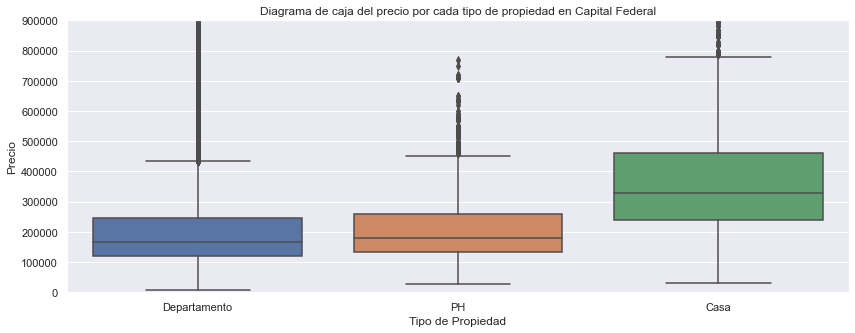

In [21]:
# Diagrama de caja del precio por cada tipo de propiedad en Capital Federal

plt.figure(figsize=(14,5))

sns.boxplot(data = filter_surface_all, x = 'property_type', y = "price")

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.title('Diagrama de caja del precio por cada tipo de propiedad en Capital Federal')
plt.ylim(0, 900000)

Se filtra el dataset utilizando el criterio del rango intercuartílico (q75+1,5*IQR) para la variable price:

In [22]:
# Definimos los percentiles de precios para cada tipo de propiedad en Capital Federal

#Percentiles para los departamentos
q75, q25 = np.percentile((filter_surface_all.price.loc[filter_surface_all.property_type == 'Departamento']), [75 ,25])
iqr = q75 - q25
lim_price_dep = q75+1.5*iqr
print('Para departamentos:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_price_dep)
print()

#Percentiles para los PH
q75, q25 = np.percentile((filter_surface_all.price.loc[filter_surface_all.property_type == 'PH']), [75 ,25])
iqr = q75 - q25
lim_price_ph = q75+1.5*iqr
print('Para PH:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_price_ph)
print()

#Percentiles para las casas
q75, q25 = np.percentile((filter_surface_all.price.loc[filter_surface_all.property_type == 'Casa']), [75 ,25])
iqr = q75 - q25
lim_price_casa = q75+1.5*iqr
print('Para casas: ')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_price_casa)
print()


Para departamentos:
iqr = 126000.0 q75 = 245000.0 q25 = 119000.0
Limite superior: 434000.0

Para PH:
iqr = 128000.0 q75 = 260000.0 q25 = 132000.0
Limite superior: 452000.0

Para casas: 
iqr = 219750.0 q75 = 459750.0 q25 = 240000.0
Limite superior: 789375.0



Descartando las instancias cuyos valores de precio son mayores a los respectivos límites superiores calculados. Se obtiene el dataset "filter_surf_price" que consta de 70913 filas y 19 columnas

In [23]:
# Filtrado de price utilizando q75+1,5*IQR

filter_surf_price = (filter_surface_all.loc[((filter_surface_all.property_type == 'Departamento') & 
                    (filter_surface_all.price < lim_price_dep)) | ((filter_surface_all.property_type == 'PH') & 
                    (filter_surface_all.price < lim_price_ph)) | ((filter_surface_all.property_type == 'Casa') & 
                    (filter_surface_all.price < lim_price_casa))])

print(filter_surf_price.shape)


(70913, 19)


Finalmente hay que resaltar que no se hizo filtrado para los valores inferiores segun el criterio de rango intercuartílico q25-1.5*IQR ya que tanto para surface_total como para price los valores serían negativos

Para visualizar la relación entre las variables hacemos un pairplot, excluyendo las variables lat y lon. Se observa a grandes rasgos la relación proporcional entre la superficie total y superficie cubierta de una propiedad con relación a su precio.

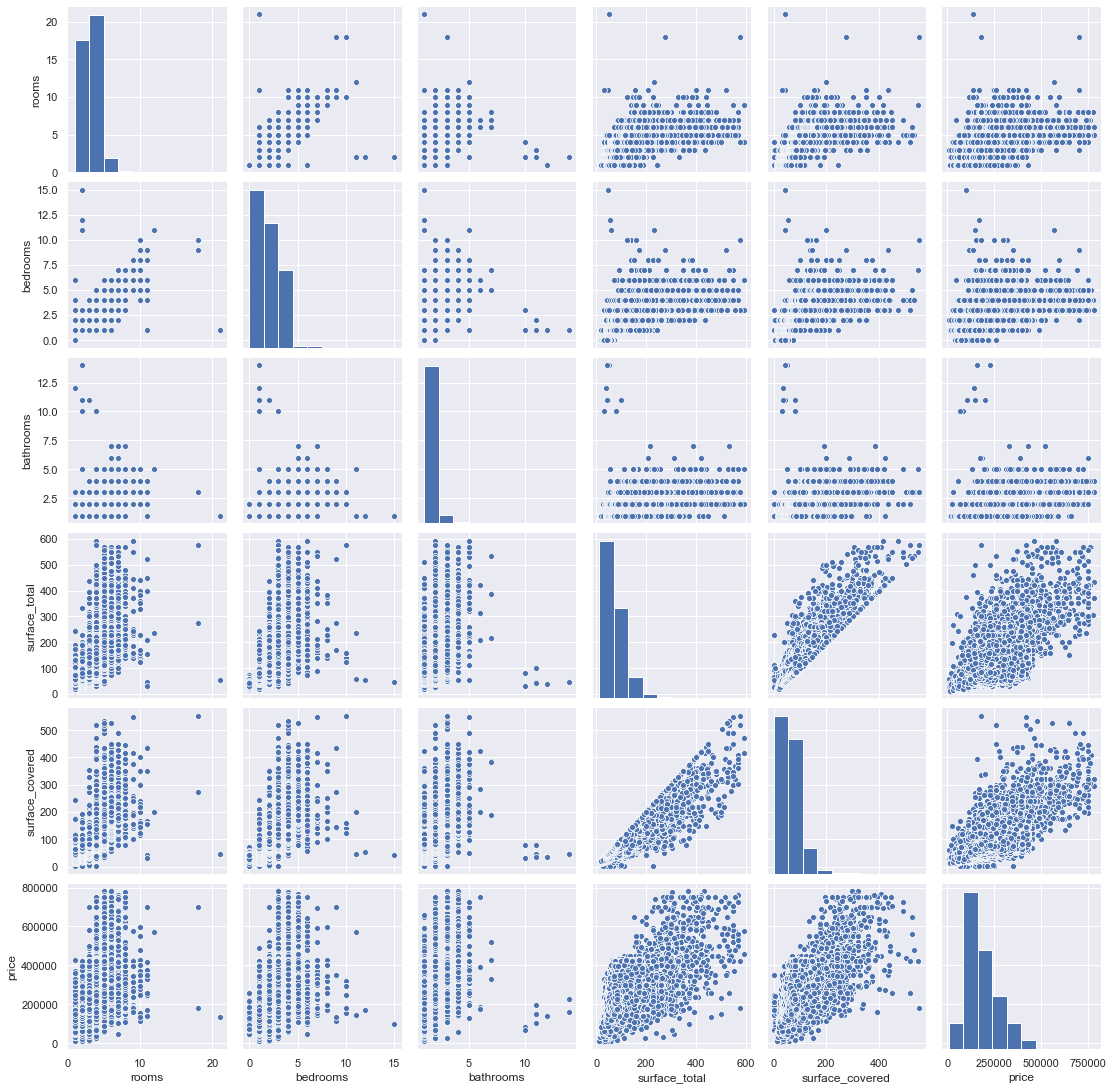

In [24]:
sns.pairplot(filter_surf_price.drop(columns = ['lat','lon']))

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

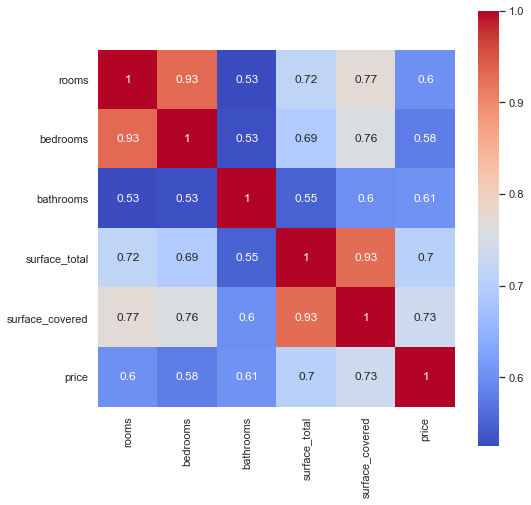

In [25]:
# Heat map para la data de Capital Federal

corr= filter_surf_price.drop(columns = ['property_type', 'lat','lon']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True,cmap= 'coolwarm')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

In [26]:
# Heat map para los Departamentos de Capital Federal

dep_surf_price = (filter_surf_price.loc[(filter_surf_price.property_type == 'Departamento')])
                  
print(dep_surf_price.shape)

(60298, 19)


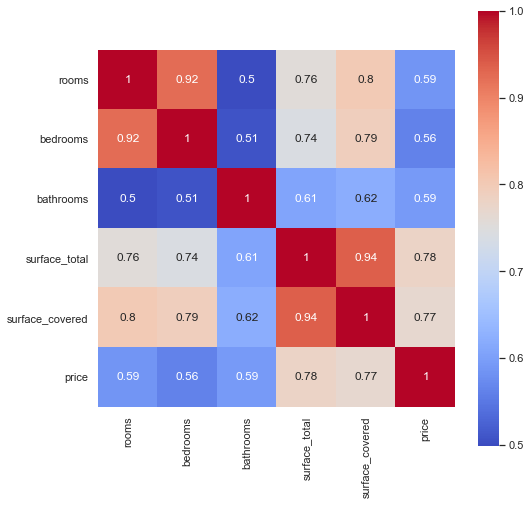

In [27]:
corr_dep = dep_surf_price.drop(columns = ['property_type', 'lat','lon']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_dep, cbar = True,  square = True, annot=True,cmap= 'coolwarm')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

In [28]:
# Heat map para los PH de Capital Federal

ph_surf_price = (filter_surf_price.loc[(filter_surf_price.property_type == 'PH')])
                  
print(ph_surf_price.shape)

(8747, 19)


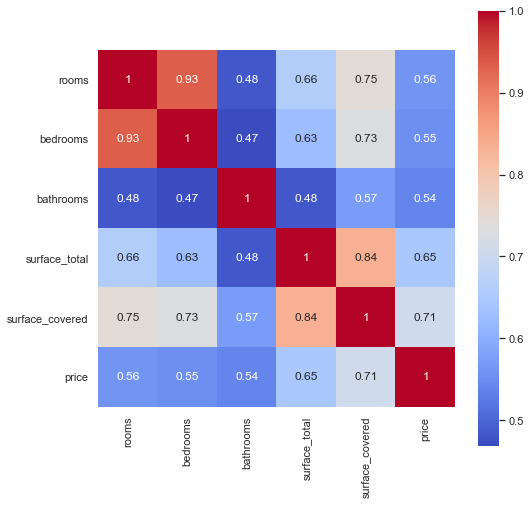

In [29]:
corr_ph = ph_surf_price.drop(columns = ['property_type', 'lat','lon']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_ph, cbar = True,  square = True, annot=True,cmap= 'coolwarm')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

In [30]:
# Heat map para las casas de Capital Federal

casa_surf_price = (filter_surf_price.loc[(filter_surf_price.property_type == 'Casa')])
                  
print(casa_surf_price.shape)

(1868, 19)


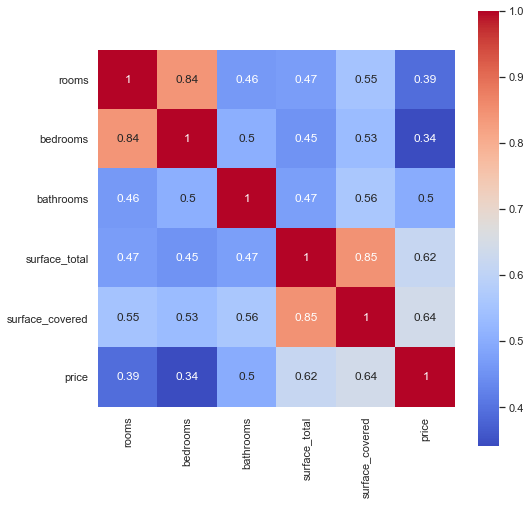

In [31]:
corr_casa = casa_surf_price.drop(columns = ['property_type', 'lat','lon']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_casa, cbar = True,  square = True, annot=True,cmap= 'coolwarm')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

Después de realizar los heat map por cada tipo de propiedad, se observa que para departamentos las variables que tienen una mayor correlación con el precio son en primer lugar la superficie total y luego la superficie cubierta, mientras que para PH y casas la superficie cubierta es la variable con mayor correlacion con el precio seguida por la superficie total.

En los tres tipos de propiedades las variables rooms, bedrooms y bathrooms son variables cuya correlacion con el precio es menor. Por lo tanto las mejores variables para predecir el precio son surface_total y surface_covered, aunque no se puede descartar el impacto que tengan las otras variables al momento de predecir precios usando modelos de Machine Learning

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**PLANTEAMIENTO DE LA PREGUNTA**

En este caso podemos hacernos la pregunta: ¿Cuáles son los tres barrios más caros y los tres barrios más baratos de Buenos Aires?

Para intentar responder esta pregunta usaremos el dataset "filter_surf_price", que ya está filtrado por superficie y precio. Luego se calculan y se grafican los promedios de los precios por cada barrio

l3
Puerto Madero           319381.96
Las Cañitas             242438.42
Recoleta                237137.60
Belgrano                229890.82
Barrio Norte            219320.08
Nuñez                   217540.53
Villa Devoto            215070.25
Palermo                 214601.62
Coghlan                 201935.23
Retiro                  199052.20
Colegiales              196633.37
Parque Centenario       194969.28
Barracas                189940.57
Villa Urquiza           189443.97
Caballito               188646.15
Saavedra                186682.19
Versalles               186199.82
Villa Pueyrredón        185555.83
Villa Ortuzar           184709.29
Agronomía               180249.19
Villa del Parque        178732.24
Abasto                  175328.81
Parque Chas             174026.81
Almagro                 173577.48
Mataderos               168046.37
Catalinas               166200.00
Chacarita               165308.97
Flores                  164390.59
Villa General Mitre     158488.53
Velez Sarsf

<AxesSubplot:xlabel='Barrios', ylabel='Precio promedio'>

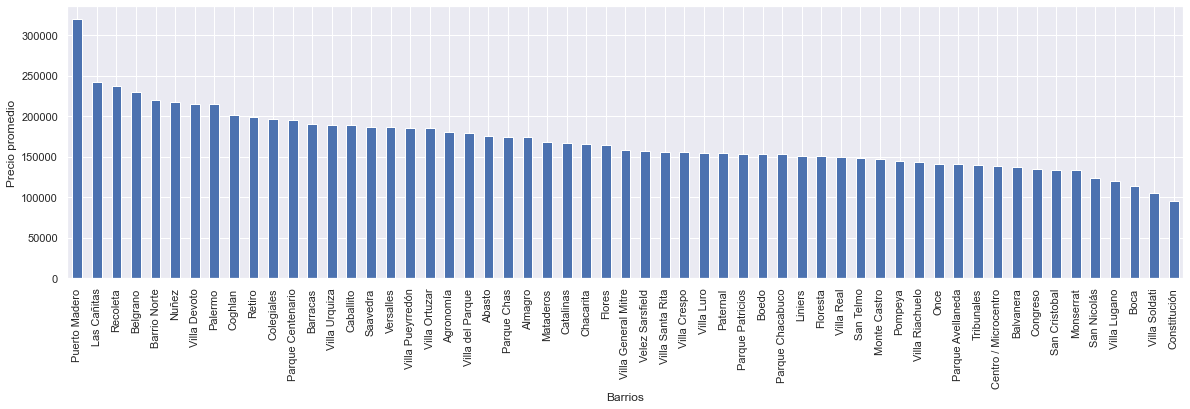

In [32]:
#Se agrupa la información del dataset por precio promedio
filter_surf_price_2 = filter_surf_price.groupby("l3")['price'].mean()

#Se ordenan los datos en forma descendente
filter_surf_price_3 = filter_surf_price_2.sort_values(ascending=False)
filter_surf_price_3 = filter_surf_price_3.round(decimals=2)

#Se presentan los barrios ordenados desde el más caro al más barato y se hace el gráfico de barras
print(filter_surf_price_3)
plt.figure(figsize=(20,5))
filter_surf_price_3.plot(kind='bar',xlabel='Barrios',ylabel='Precio promedio')

En el gráfico de barras podemos observar que los más caros son: Puerto Madero, Las Cañitas y Recoleta. Mientras que los más baratos son: Boca, Villa Soldati y Constitución. 

A continuación presentamos el precio promedio de las propiedades de los tres barrios más caros y los tres más baratos.

In [33]:
df_respuesta = filter_surf_price_3.filter(items=['Puerto Madero', 'Las Cañitas', 'Recoleta','Boca','Villa Soldati','Constitución'])
df_respuesta = df_respuesta.round(decimals=2)
print(df_respuesta)

l3
Puerto Madero    319381.96
Las Cañitas      242438.42
Recoleta         237137.60
Boca             113286.53
Villa Soldati    105355.17
Constitución      95052.08
Name: price, dtype: float64


Este resultado obtenido puede presentar sesgos, debido a que previamente hemos filtrado el dataset original por precio y superficie usando el criterio del rango intercuartílico. Si se usa otro criterio como por ejemplo filtrar los outliers por desviación estandar los resultados podrían variar.

Igualmente el criterio seleccionado para definir qué es un barrio caro o barato fue el promedio del precio en cada barrio. Otras formas de hacer esta evaluación serían estudiar el precio por metro cuadrado o el valor de la mediana del precio por barrio.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**3.1 FILTRADO DEL DATASET**

A continuación procedemos a filtrar el dataset según los criterios solicitados

In [34]:
# Filtrado del Dataset
df_ml_1 = (data_properati.loc[((data_properati.property_type == 'Departamento') | 
        (data_properati.property_type == 'PH') |
        (data_properati.property_type == 'Casa')) &
        (data_properati.price <= 4000000) & (data_properati.surface_total <= 1000) & 
        (data_properati.surface_total >= 15) & (data_properati.l2 == 'Capital Federal')])

df_ml_2 = df_ml_1.drop(columns = ['property_type', 'lat','lon','l1','l2','l3','start_date','end_date','created_on',
                     'currency','title','description','operation_type'])

df_ml_final = df_ml_2.dropna() 

print(df_ml_final.shape)
df_ml_final

(81019, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0
...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0
146555,3.0,2.0,2.0,144.0,134.0,480000.0
146556,4.0,2.0,2.0,317.0,143.0,530000.0
146557,3.0,2.0,2.0,145.0,145.0,420000.0


Luego de filtrar el dataset se verificó que cuenta con 81019 instancias y 6 columnas. Se procede a evaluar la correlación lineal entre las variables, observando que el precio tiene una mayor correlación con la superficie total y el número de baños que con respecto a las otras variables.

Igualmente se observa que la superficie cubierta es la variable que presenta la correlación lineal más débil con el precio

In [35]:
# Correlación lineal entre las variables
df_ml_final.corr() 

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


 **3.2 MODELO BENCHMARK DE MACHINE LEARNING**
 
Para iniciar el análisis de Machine Learning procedemos a realizar un modelo benchmark, con el fin de utilizarlo como base para proceder con las mejoras correspondientes a través del ajuste de hiperparámetros y escogencia de variables predictoras.

El modelo benchmark es un modelo de k vecinos más cercanos, con un valor de vecinos n=5, siendo la superficie total la única variable predictora X y el precio la variable Y a predecir.

La métrica que se va a escoger para evaluar los resultados de los modelos es el RMSE (root mean squared error), el cual evalúa la diferencia entre los valores Y reales y los Y que predice un modelo.


In [36]:
# Se realiza el train test split

# Variable X = surface_total
X = df_ml_final.iloc[:,3].values

# Variable y = price
y = df_ml_final.iloc[:,5].values

from sklearn.model_selection import train_test_split

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [37]:
# Definimos el modelo benchmark y lo entrenamos

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 216861.79306903091
Raíz del error cuadrático medio en Test: 218633.410892772


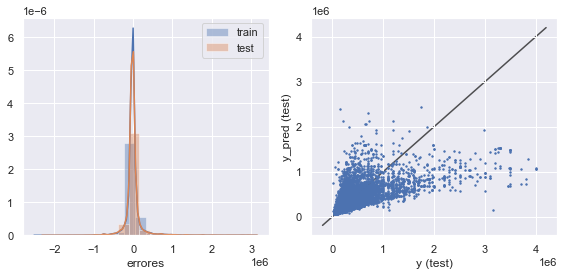

In [38]:
# Cálculo de RMSE del modelo benchmark

from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

print('Modelo: Regresión lineal')

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Finalmente se obtuvieron los valores RMSE Train = 216861.79 y RMSE Test = 218633.41, que servirán como punto de comparación para evaluar las mejoras en los siguientes modelos de Machine Learning

**3.3 MODELOS DE VECINOS MAS CERCANOS Y ARBOL DE DECISION**

A continuación se realizarán varios modelos de machine learning de vecinos más cercanos y de árbol de decisión, con distintas variables predictoras en cada caso. Se harán iteraciones de sus respectivos hiperparámetros para determinar en cual de ellos ocurre el menor valor RMSE

**3.3.1 MODELOS DE MACHINE LEARNING #1**

En este caso la cantidad de baños y superficie total son las variables predictoras X y el precio la variable Y a predecir.




In [39]:
# Se realiza el train test split

# Variables X = bathrooms, surface_total
X = df_ml_final.iloc[:,2:4]

# Variable y = price
y = df_ml_final.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
# Definimos el modelo de k vecinos

# Empezamos importando la funcion KNeighborsRegressor de la libreria SciKit Learn

from sklearn.neighbors import KNeighborsRegressor

# Definimos las listas vacias para los valores de RMSE deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
      
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de número de vecinos, RMSE Train y RMSE Test   
zippedlist = list(zip(k_vecinos, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['n_neighbors', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,n_neighbors,rmse_train,rmse_test
0,1,198133.62,224586.23
1,2,171614.83,197076.72
2,3,164097.62,189350.00
3,4,161447.96,184397.04
4,5,161838.10,182746.48
5,6,162539.47,183539.37
6,7,162885.06,182827.18
7,8,164002.05,184535.17
8,9,164928.40,183631.04
9,10,165722.60,184123.01


Text(0, 0.5, 'RMSE')

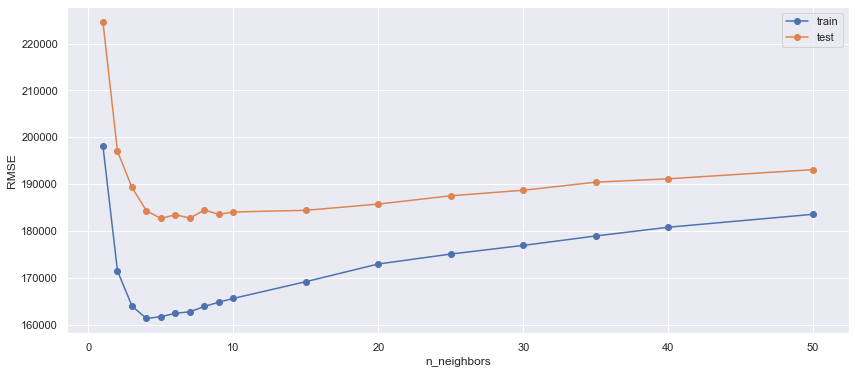

In [41]:
# Se grafican los valores de RMSE vs numero de vecinos para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')

Se observa que para este modelo de vecinos más cercanos el menor RMSE para el set Train se obtuvo con el valor de n=4, sin embargo el menor RMSE para el set Test se obtuvo para n=5. Realizando el gráficos de valores predichos vs. valores reales para el set Test:

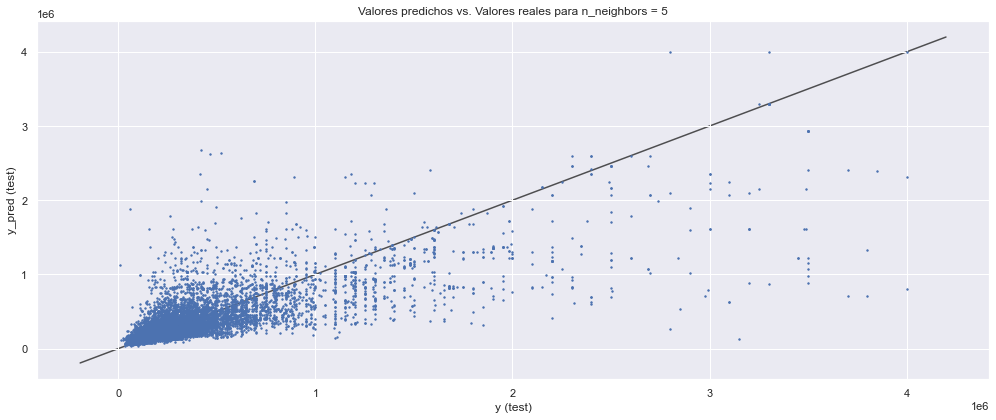

In [42]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de vecinos igual a 5
knn_regressor = KNeighborsRegressor(n_neighbors=5)
    
# Entrenar el modelo 
knn_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = knn_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para n_neighbors = 5')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

A continuación se realiza el modelo de árbol de decisiones:

In [43]:
# Definimos el modelo de arbol de decisiones

# Empezamos importando la funcion DecisionTreeRegressor de la libreria SciKit Learn
from sklearn.tree import DecisionTreeRegressor

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de m 
for m in max_values:
        
    # Definir el modelo con el valor de max depth deseado
    tree_regressor = DecisionTreeRegressor(max_depth= m, random_state=42)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de max depth, RMSE Train y RMSE Test   
zippedlist = list(zip(max_values, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['max_depth_values', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse


,max_depth_values,rmse_train,rmse_test
0,1,241977.39,246824.57
1,2,215485.17,219189.81
2,3,202993.55,204792.88
3,4,192526.38,196464.14
4,5,188213.40,191674.51
5,6,182194.09,187659.59
6,7,176560.91,185188.97
7,8,171828.74,183591.95
8,9,164462.09,177954.20
9,10,157823.34,177801.88


Text(0, 0.5, 'rmse')

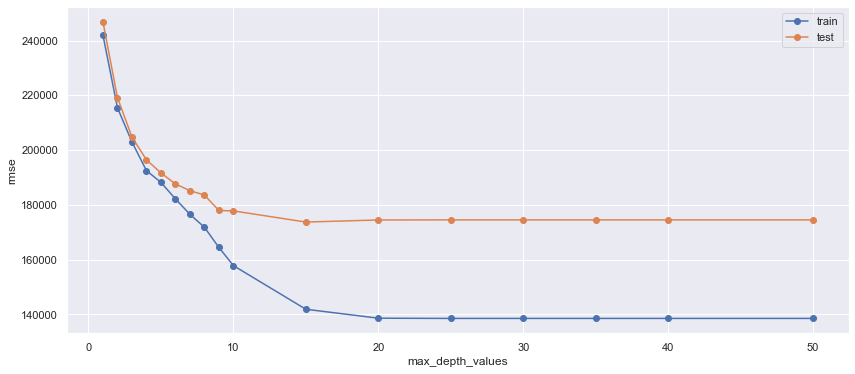

In [44]:
# Se grafican los valores de RMSE vs max_depth para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(max_values,lista_rmse_train,'o-',label='train' )
plt.plot(max_values,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('max_depth_values')
plt.ylabel('rmse')

Para el modelo de árbol de decisión el menor RMSE para el set Train se obtuvo con los valores de max depth a partir de 20. Sin embargo el set Test obtuvo el mejor ajuste para un max depth de 15. Realizando el gráficos de valores predichos vs. valores reales para el set Test

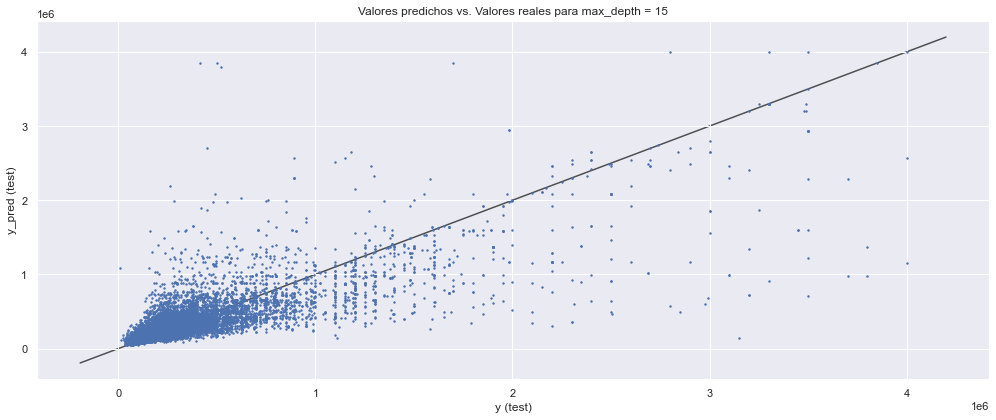

In [45]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de max depth igual a 15
tree_regressor = DecisionTreeRegressor(max_depth= 15, random_state=42)
    
# Entrenar el modelo 
tree_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = tree_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para max_depth = 15')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

**3.3.2 MODELOS DE MACHINE LEARNING #2**

En este caso las variables predictoras X son rooms, bathrooms y surface_total. El precio es la variable Y a predecir.

In [46]:
# Se realiza el train test split

# Variables X = rooms, bathrooms, surface_total
X = df_ml_final.iloc[:,[0,2,3]]

# Variable y = price
y = df_ml_final.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
# Definimos el modelo de k vecinos

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de número de vecinos, RMSE Train y RMSE Test  
zippedlist = list(zip(k_vecinos, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['n_neighbors', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,n_neighbors,rmse_train,rmse_test
0,1,145786.17,190148.41
1,2,136654.54,175473.48
2,3,138113.81,173049.95
3,4,140482.00,170804.44
4,5,143314.92,171169.34
5,6,146363.25,171448.61
6,7,148877.75,173066.27
7,8,151160.88,173637.23
8,9,153548.19,174737.36
9,10,155094.93,175398.28


Text(0, 0.5, 'rmse')

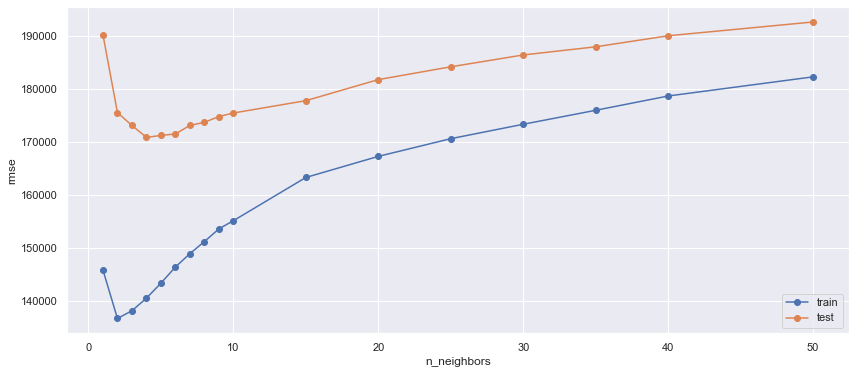

In [48]:
# Se grafican los valores de RMSE vs número de vecinos para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('rmse')

Se observa que para este modelo de vecinos más cercanos el menor RMSE para el set Train se obtuvo con el valor de n=2, sin embargo el menor RMSE para el set Test se obtuvo para n=4. Realizando el gráficos de valores predichos vs. valores reales para el set Test:

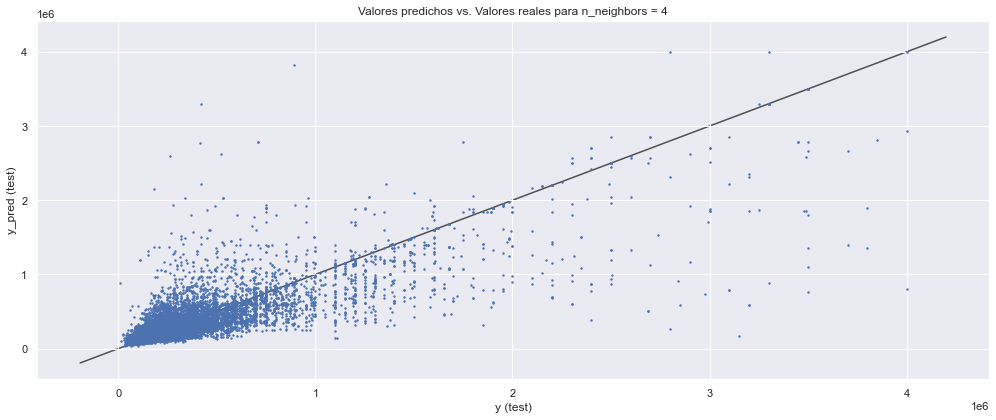

In [49]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de vecinos igual a 4
knn_regressor = KNeighborsRegressor(n_neighbors=4)
    
# Entrenar el modelo 
knn_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = knn_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para n_neighbors = 4')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

A continuación se realiza el modelo de árbol de decisiones:

In [50]:
# Definimos el modelo de arbol de decisiones y lo entrenamos

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de m que vamos a explorar
max_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de m 
for m in max_values:
    
    # Definir el modelo con el valor de max_depth deseado
    tree_regressor = DecisionTreeRegressor(max_depth= m, random_state=42)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de max depth, RMSE Train y RMSE Test   
zippedlist = list(zip(max_values, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['max_depth_values', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,max_depth_values,rmse_train,rmse_test
0,1,241977.39,246824.57
1,2,215485.17,219189.81
2,3,202993.55,204792.88
3,4,192505.66,196448.18
4,5,182656.34,186986.27
5,6,175204.02,181592.98
6,7,168497.92,178191.39
7,8,161320.66,174735.66
8,9,153314.71,169186.52
9,10,144767.43,164996.12


Text(0, 0.5, 'rmse')

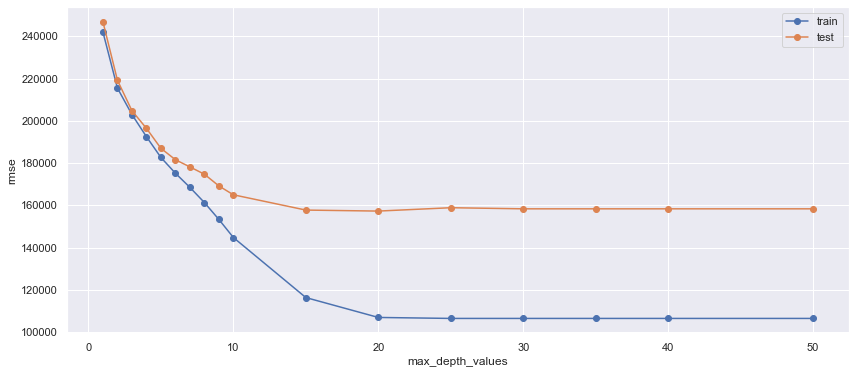

In [51]:
# Se grafican los valores de RMSE vs max_depth para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(max_values,lista_rmse_train,'o-',label='train' )
plt.plot(max_values,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('max_depth_values')
plt.ylabel('rmse')

Para el modelo de árbol de decisión el menor RMSE para el set Train se obtuvo con los valores de max depth a partir de 25. Sin embargo el set Test obtuvo el mejor ajuste para un max depth de 20. Realizando el gráfico de valores predichos vs. valores reales para el set Test:

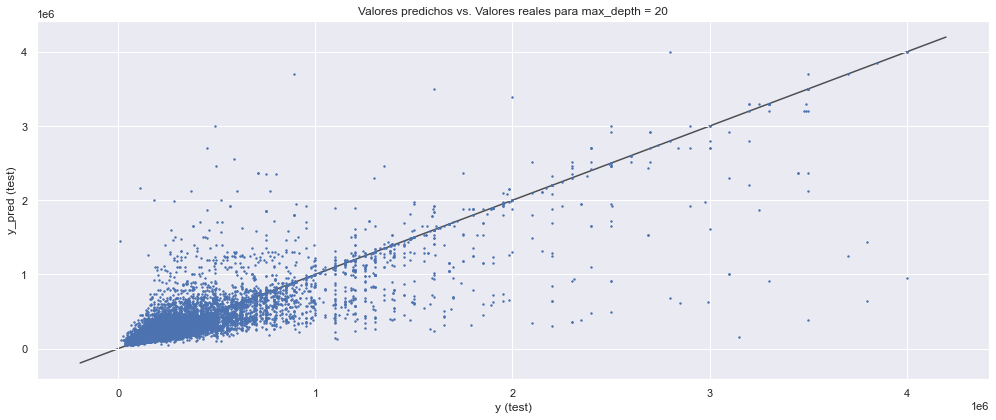

In [52]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de max depth igual a 20
tree_regressor = DecisionTreeRegressor(max_depth= 20, random_state=42)
    
# Entrenar el modelo 
tree_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = tree_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para max_depth = 20')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

**3.3.3 MODELOS DE MACHINE LEARNING #3**

En este caso las variables predictoras X son rooms, bedrooms, bathrooms y surface_total. El precio es la variable Y a predecir.

In [53]:
# Se realiza el train test split

# Variables X = rooms, bedrooms, bathrooms, surface_total
X = df_ml_final.iloc[:,0:4]

# Variable y = price
y = df_ml_final.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [54]:
# Definimos el modelo de k vecinos

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de número de vecinos, RMSE Train y RMSE Test  
zippedlist = list(zip(k_vecinos, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['n_neighbors', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse


,n_neighbors,rmse_train,rmse_test
0,1,132505.26,183248.41
1,2,129935.09,173695.18
2,3,133179.31,168859.73
3,4,136529.73,168466.41
4,5,139535.84,168960.80
5,6,143443.65,169714.40
6,7,146638.87,170929.10
7,8,149446.77,172016.01
8,9,151843.11,172836.28
9,10,153552.70,173126.54


Text(0, 0.5, 'rmse')

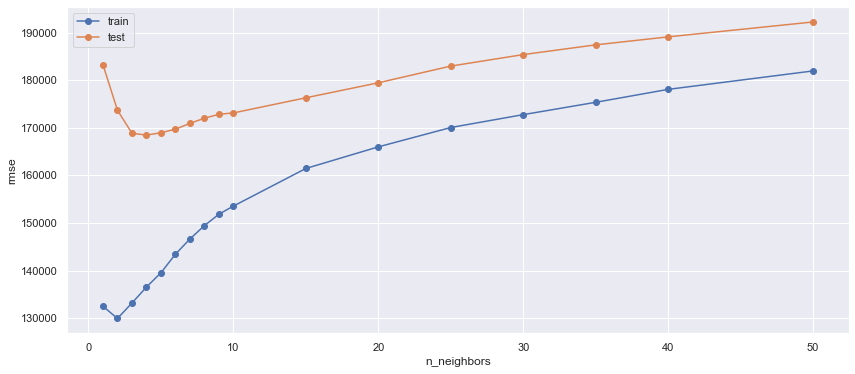

In [55]:
# Se grafican los valores de RMSE vs número de vecinos para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('rmse')

Se observa que para este modelo de vecinos más cercanos el menor RMSE para el set Train se obtuvo con el valor de n=2, sin embargo el menor RMSE para el set Test se obtuvo para n=4. Realizando el gráficos de valores predichos vs. valores reales para el set Test:

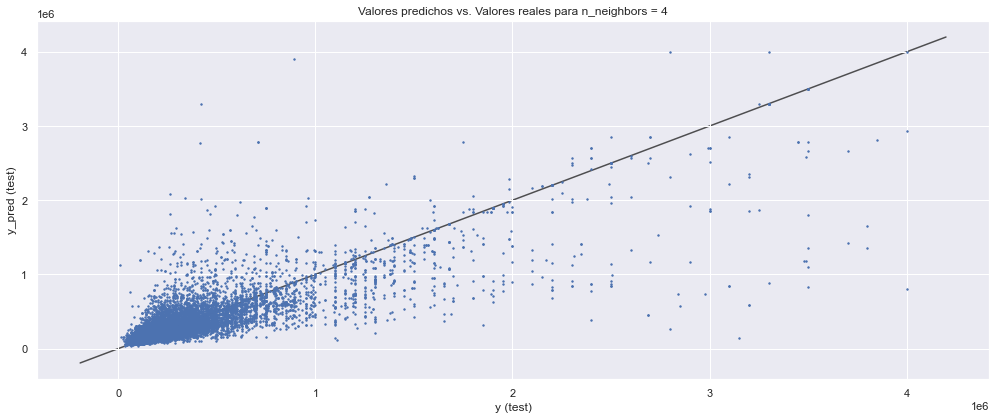

In [56]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de vecinos igual a 4
knn_regressor = KNeighborsRegressor(n_neighbors=4)
    
# Entrenar el modelo 
knn_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = knn_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para n_neighbors = 4')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

A continuación se realiza el modelo de árbol de decisiones:

In [57]:
# Definimos el modelo de arbol de decisiones

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de m que vamos a explorar
max_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de m 
for m in max_values:
    
    # Definir el modelo con el valor de max depth deseado
    tree_regressor = DecisionTreeRegressor(max_depth= m, random_state=42)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de max depth, RMSE Train y RMSE Test 
zippedlist = list(zip(max_values, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['max_depth_values', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,max_depth_values,rmse_train,rmse_test
0,1,241977.39,246824.57
1,2,215485.17,219189.81
2,3,202993.55,204792.88
3,4,192505.66,196448.18
4,5,181615.32,186728.59
5,6,174003.62,182160.13
6,7,167227.42,174937.56
7,8,160596.00,170806.73
8,9,152793.04,167678.40
9,10,144845.64,163702.31


Text(0, 0.5, 'rmse')

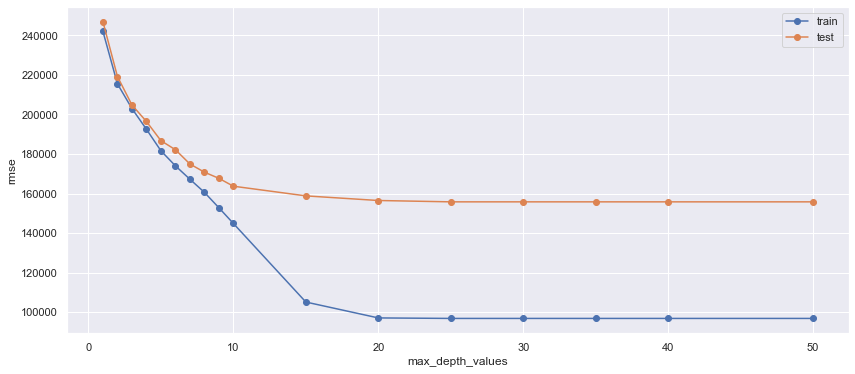

In [58]:
# Se grafican los valores de RMSE vs max_depth para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(max_values,lista_rmse_train,'o-',label='train' )
plt.plot(max_values,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('max_depth_values')
plt.ylabel('rmse')

Para el modelo de árbol de decisión el menor RMSE para el set Train y el set Test se obtuvo a partir de un max depth de 25. Realizando el gráfico de valores predichos vs. valores reales para el set Test:

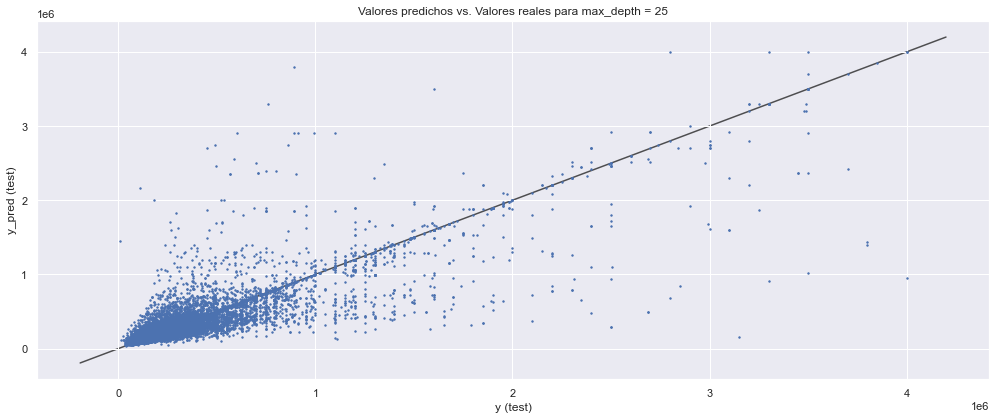

In [59]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de max depth igual a 25
tree_regressor = DecisionTreeRegressor(max_depth= 25, random_state=42)
    
# Entrenar el modelo 
tree_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = tree_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para max_depth = 25')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

**3.3.4 MODELOS DE MACHINE LEARNING #4**

En este caso las variables predictoras X son rooms, bedrooms, bathrooms, surface_total y surface_covered. El precio es la variable Y a predecir.

In [60]:
# Se realiza el train test split

# Variables X = rooms, bedrooms, bathrooms, surface_total, surface_covered
X = df_ml_final.iloc[:,0:5]

# Variable y = price
y = df_ml_final.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [61]:
# Definimos el modelo de k vecinos

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de número de vecinos, RMSE Train y RMSE Test  
zippedlist = list(zip(k_vecinos, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['n_neighbors', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,n_neighbors,rmse_train,rmse_test
0,1,77925.76,161757.06
1,2,92435.07,153607.77
2,3,103804.21,152317.82
3,4,114297.26,153695.15
4,5,121300.24,155040.13
5,6,126981.10,157103.70
6,7,131893.26,158496.14
7,8,135799.45,159931.45
8,9,139143.30,160067.65
9,10,142074.14,161749.10


Text(0, 0.5, 'rmse')

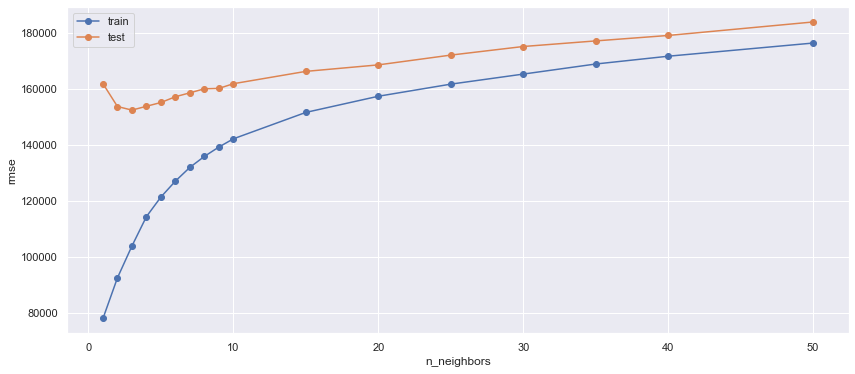

In [62]:
# Se grafican los valores de RMSE vs número de vecinos para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('rmse')

Se observa que para este modelo de vecinos más cercanos el menor RMSE para el set Train se obtuvo con el valor de n=1, sin embargo el menor RMSE para el set Test se obtuvo para n=3. Realizando el gráficos de valores predichos vs. valores reales para el set Test:

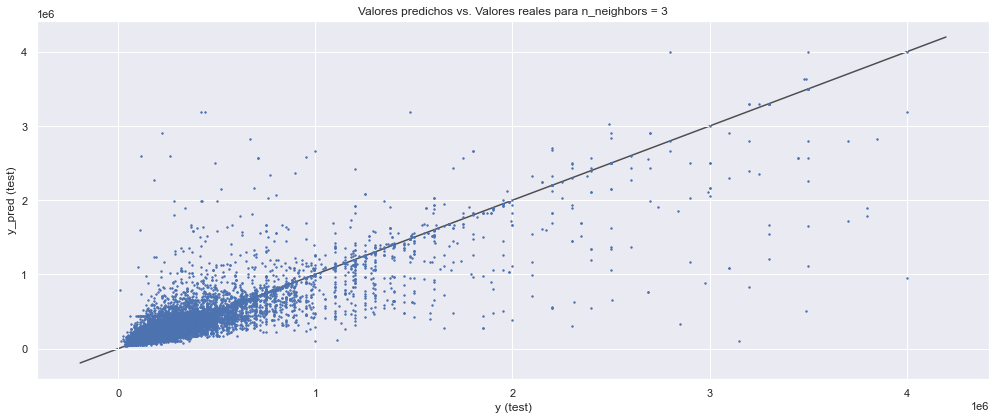

In [63]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de vecinos igual a 3
knn_regressor = KNeighborsRegressor(n_neighbors=3)
    
# Entrenar el modelo 
knn_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = knn_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para n_neighbors = 3')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

A continuación se realiza el modelo de árbol de decisiones:

In [64]:
# Definimos el modelo de arbol de decisiones

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de m que vamos a explorar
max_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de m 
for m in max_values:
    
    # Definir el modelo con el valor de max depth deseado
    tree_regressor = DecisionTreeRegressor(max_depth= m, random_state=42)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

#Se crea un dataframe para mostrar los valores de max depth, RMSE Train y RMSE Test 
zippedlist = list(zip(max_values, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['max_depth_values', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,max_depth_values,rmse_train,rmse_test
0,1,234569.01,236555.77
1,2,206608.36,209013.62
2,3,191783.49,194688.15
3,4,178947.61,183592.64
4,5,169200.18,174352.74
5,6,159067.54,166034.12
6,7,149200.55,160810.90
7,8,139064.96,158244.21
8,9,129685.36,154597.73
9,10,120797.50,152950.68


Text(0, 0.5, 'rmse')

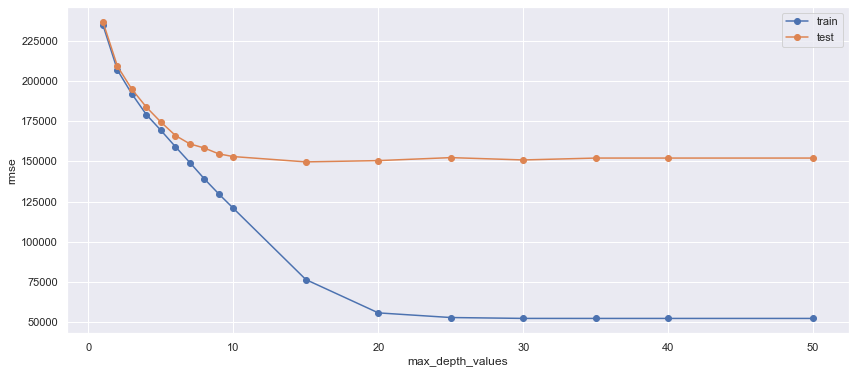

In [65]:
# Se grafican los valores de RMSE vs max_depth para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(max_values,lista_rmse_train,'o-',label='train' )
plt.plot(max_values,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('max_depth_values')
plt.ylabel('rmse')

Para el modelo de árbol de decisión el menor RMSE para el set Train se obtuvo a partir de un max depth de 35. Sin embargo el menor RMSE para el set Test fue para max depth igual a 15. Realizando el gráfico de valores predichos vs. valores reales para el set Test:

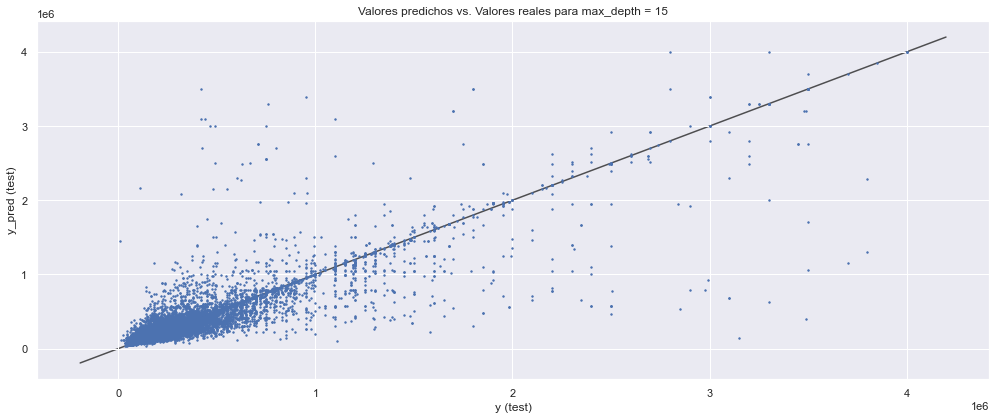

In [66]:
#Graficando y_pred (test) vs y (test):

# Definir el modelo con el valor de max depth igual a 15
tree_regressor = DecisionTreeRegressor(max_depth= 15, random_state=42)
    
# Entrenar el modelo 
tree_regressor.fit(X_train, y_train)

# Predecir sobre el set de evaluación
y_test_pred = tree_regressor.predict(X_test)

# Gráficando
plt.figure(figsize = (14,6))
ax = plt.subplot()
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Valores predichos vs. Valores reales para max_depth = 15')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')    
plt.tight_layout()
plt.show()

**3.4 CONCLUSIONES**

En los modelos de Machine Learning analizados desde el punto 3.3.1 hasta el 3.3.4 se observa que se pudo minimizar el valor de RMSE con respecto al modelo benchmark. Además en todos los casos el modelo de arbol de decisiones alcanzó menores RMSE que el modelo de vecinos más cercanos.

Para predecir los precios de las propiedades, elegimos como mejor modelo el árbol de decisión del punto 3.3.4 con max depth igual a 15, ya que dio como resultado el menor valor de RMSE para un set Test entre todos casos estudiados (RMSE test = 149649.08)

Con el fin de mejorar la predicción de estos modelos de machine learning podriamos considerar los siguientes puntos:
1. Realizar modelos que puedan diferenciar el tipo de propiedad (Departamento, PH y Casa)
1. Evaluar otros hiperparámetros no incluidos en estas iteraciones realizadas. Por ejemplo número de vecinos y max depth de 11 a 14 y de 16 a 19
1. Utilizar modelos de machine learning más complejos
1. Utilizar otras métricas para evaluación además de RMSE
1. Aplicar otros criterios para el filtrado del dataset